In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('dataset/final_data.csv')

In [4]:
dataset = pd.get_dummies(dataset, columns=['label'])

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=8) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset

In [6]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T

In [7]:
#конвертировать в tensor (количество образцов, количество признаков):(1, 3) -> (1, (r,g,b))

In [16]:
train_dataset_tf=tf.convert_to_tensor(train_dataset)
train_labels_tf=tf.convert_to_tensor(train_labels)
test_dataset_tf=tf.convert_to_tensor(test_dataset)
test_labels_tf=tf.convert_to_tensor(test_labels)

In [17]:
train_dataset_tf = np.asarray(train_dataset_tf).astype('float32')
test_dataset_tf = np.asarray(test_dataset_tf).astype('float32')

In [18]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(11, activation = "softmax"),
])

In [19]:
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [20]:
history = model.fit(x=train_dataset_tf, y=train_labels_tf,
                    epochs=512,
                    batch_size=2048,
                    validation_data=(test_dataset_tf, test_labels_tf))

Epoch 1/512
2/2 [==============================] - 1s 255ms/step - loss: 35.3528 - accuracy: 0.1957 - val_loss: 25.1608 - val_accuracy: 0.0198
Epoch 2/512
2/2 [==============================] - 0s 50ms/step - loss: 23.1925 - accuracy: 0.1531 - val_loss: 16.2617 - val_accuracy: 0.1871
Epoch 3/512
2/2 [==============================] - 0s 51ms/step - loss: 15.3616 - accuracy: 0.2605 - val_loss: 11.1244 - val_accuracy: 0.3119
Epoch 4/512
2/2 [==============================] - 0s 45ms/step - loss: 10.8295 - accuracy: 0.3328 - val_loss: 7.8894 - val_accuracy: 0.4267
Epoch 5/512
2/2 [==============================] - 0s 36ms/step - loss: 7.6181 - accuracy: 0.3958 - val_loss: 5.1487 - val_accuracy: 0.4297
Epoch 6/512
2/2 [==============================] - 0s 41ms/step - loss: 4.8372 - accuracy: 0.3889 - val_loss: 3.4262 - val_accuracy: 0.4485
Epoch 7/512
2/2 [==============================] - 0s 40ms/step - loss: 3.3859 - accuracy: 0.4189 - val_loss: 2.4717 - val_accuracy: 0.5208
Epoch 8/512


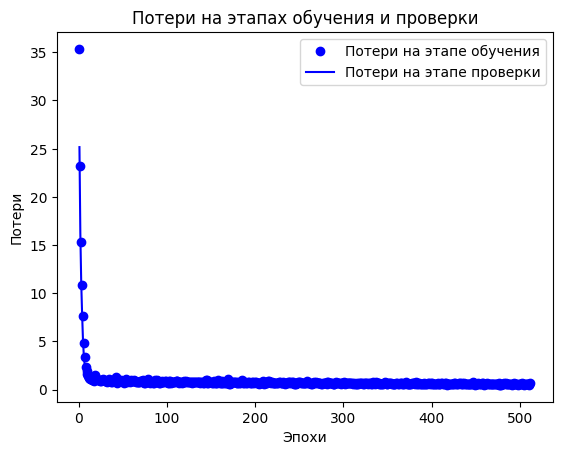

In [21]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_dataset_tf, test_labels_tf)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.7416
Test accuracy: 0.742


In [23]:
model.save("model/pickcolor.keras")